In [1]:
import ServerFunctions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import simplejson
import psycopg
import textwrap

In [2]:
with open("hasla.txt") as db_con_file:
   creds = simplejson.loads(db_con_file.read())
connection = psycopg.connect(
     host=creds['host'],
     user=creds['user'],
     dbname=creds['dbname'],
     password=creds['passwd'],
     port=creds['port'])
c = connection.cursor()

In [3]:
c.execute("SELECT * FROM Produkty,Pracownicy WHERE Produkty.ID_Pracownika = Pracownicy.ID_Pracownika ORDER BY Produkty.Ilosc DESC")
returnarray = c.fetchall()

In [4]:
#tab = []
#tab2 = []
#for x in returnarray:
    #print([x[1],x[2]])
#    tab.append(x[1])
#    tab2.append(x[2])

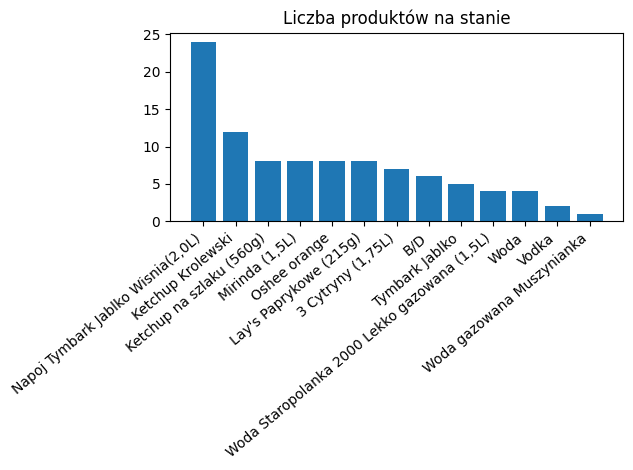

In [13]:
X = [x[1] for x in returnarray]
Y = [x[2] for x in returnarray]
#Produkty bez nazwy dostają nazwę Brak Danych
for x in range(len(X)):
    #print(X[x])
    if X[x] == None:
        X[x] = "B/D"
# Create the bar chart
fig, ax = plt.subplots()
ax.bar(X, Y)
plt.title('Liczba produktów na stanie')
plt.xticks(rotation=40, ha='right')


# Show the plot
plt.tight_layout()
plt.show()


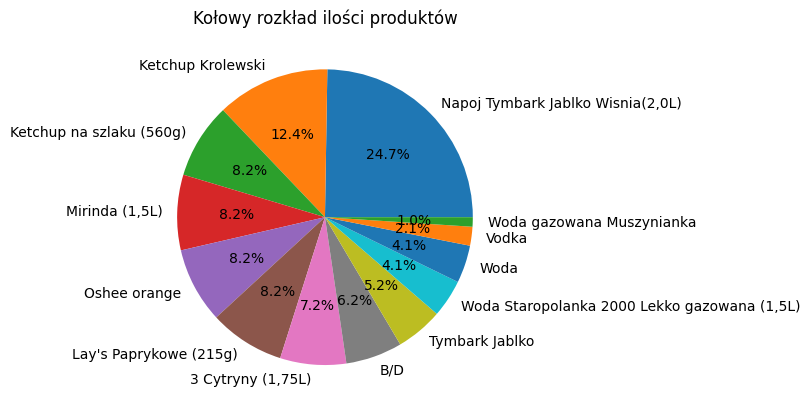

In [14]:
fig, ax = plt.subplots()
ax.pie(Y, labels=X,autopct='%1.1f%%')
plt.title('Kołowy rozkład ilości produktów')
plt.show()